In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import pickle as pkl
import cmasher as cmr
import matplotlib.patches as mpatches

plt.style.use("default")

In [22]:
# dataset = "CIFAR_seed=10000_"
# with open(f"./{dataset}combined_list.pkl", "rb") as f:
#     combined = pkl.load(f)

In [23]:
# bar_width = 0.2
# fig, axes = plt.subplots(3, 3, figsize=(15, 15))
# for num_layers in range(3):
#     for num_channels in range(3):
#         # print(f'num_layers={num_layers}, num_recurrence={num_recurrence}')
#         ax = axes[num_layers, num_channels]
#         ax.set_title(
#             f"num_layers={num_layers + 2}, num_channels={num_channels * 8 + 8}"
#         )
#         ax.set_xlabel("num_recurrence")
#         ax.set_ylabel("test_acc")
#         ax.bar(
#             np.arange(3),
#             combined["test_accs"][num_layers, :, num_channels],
#             label="test_acc",
#         )
#         ax.bar(
#             np.arange(3),
#             combined["masked_test_accs"][num_layers, :, num_channels],
#             label="masked_test_acc",
#             color="tab:green",
#         )
#         ax.bar(
#             np.arange(3),
#             combined["noisy_test_accs"][num_layers, :, num_channels],
#             label="noisy_test_acc",
#             color="tab:orange",
#         )

#         ax.set_xticks(np.arange(3))
# fig.suptitle(f"{dataset} test_accs")

# handles, labels = axes[0, 0].get_legend_handles_labels()
# fig.legend(handles, labels)
# fig.tight_layout()
# fig.savefig(f"{dataset}accuracy.png")

In [43]:
dataset = "mnist"
seeds = [0, 10, 100, 1000, 10000]
constant_acc = {"mnist": 0.1135, "cifar10": 0.10}
all_acc = []
all_noisy_acc = []
all_masked_acc = []
all_left_masked_acc = []
all_gaussian_blur_acc = []
num_nans = 0
losses = []
for seed in seeds:
    with open(f"./results/{dataset}_ind_bn_seed={seed}_combined_list.pkl", "rb") as f:
        temp = pkl.load(f)
    # Set values to nan if they are equal to the constant accuracy
    temp["test_accs"][np.where(temp["test_accs"] == constant_acc[dataset])] = np.nan
    temp["test_noisy_accs"][np.where(temp["test_noisy_accs"] == constant_acc[dataset])] = np.nan
    temp["test_masked_accs"][np.where(temp["test_masked_accs"] == constant_acc[dataset])] = np.nan
    temp["test_left_masked_accs"][np.where(temp["test_left_masked_accs"] == constant_acc[dataset])] = np.nan
    temp["test_gaussian_blur_accs"][np.where(temp["test_gaussian_blur_accs"] == constant_acc[dataset])] = np.nan
    num_nans += np.count_nonzero(np.isnan(temp["test_accs"])) + \
                np.count_nonzero(np.isnan(temp["test_noisy_accs"])) + \
                np.count_nonzero(np.isnan(temp["test_masked_accs"])) + \
                np.count_nonzero(np.isnan(temp["test_left_masked_accs"])) + \
                np.count_nonzero(np.isnan(temp["test_gaussian_blur_accs"]))
    all_acc.append(temp["test_accs"])
    all_noisy_acc.append(temp["test_noisy_accs"])
    all_masked_acc.append(temp["test_masked_accs"])
    all_left_masked_acc.append(temp["test_left_masked_accs"])
    all_gaussian_blur_acc.append(temp["test_gaussian_blur_accs"])

    losses = temp['losses']

    print(temp['losses'].shape)
    print(temp.keys())

print("Num nans removed:", num_nans)
all_acc = np.array(all_acc)
all_noisy_acc = np.array(all_noisy_acc)
all_masked_acc = np.array(all_masked_acc)
all_left_masked_acc = np.array(all_left_masked_acc)
all_gaussian_blur_acc = np.array(all_gaussian_blur_acc)
all_acc.shape

print(all_acc[:, 2, 2, 2])

# all_noisy_acc[:, 2, 1, 1]

# print(np.std([0.9578, 0.6909, 0.7787, 0.7752, 0.2254, 0.8449]))
# all_acc[:, 2, 2, 2]

(3, 3, 3, 590)
dict_keys(['losses', 'test_accs', 'test_noisy_accs', 'test_masked_accs', 'test_left_masked_accs', 'test_gaussian_blur_accs'])
(3, 3, 3, 590)
dict_keys(['losses', 'test_accs', 'test_noisy_accs', 'test_masked_accs', 'test_left_masked_accs', 'test_gaussian_blur_accs'])
(3, 3, 3, 590)
dict_keys(['losses', 'test_accs', 'test_noisy_accs', 'test_masked_accs', 'test_left_masked_accs', 'test_gaussian_blur_accs'])
(3, 3, 3, 590)
dict_keys(['losses', 'test_accs', 'test_noisy_accs', 'test_masked_accs', 'test_left_masked_accs', 'test_gaussian_blur_accs'])
(3, 3, 3, 590)
dict_keys(['losses', 'test_accs', 'test_noisy_accs', 'test_masked_accs', 'test_left_masked_accs', 'test_gaussian_blur_accs'])
Num nans removed: 7
[0.1703 0.767  0.9479 0.7226    nan]


In [44]:
subbed_losses = losses[0, 0, 0, :] - losses[1, 0, 0, :] 
subbed_losses 

array([ 7.77673721e-03, -1.37856722e-01, -4.96999264e-01, -7.08159447e-01,
        1.41358376e-02, -5.86182177e-01, -2.00225651e-01, -1.84270263e-01,
       -2.93396920e-01, -3.55672657e-01, -3.42594564e-01, -2.80381054e-01,
       -1.60913587e-01, -1.38786077e-01, -9.27795172e-02, -2.08184510e-01,
       -1.62341088e-01, -1.22242242e-01, -1.78058475e-01, -1.83762401e-01,
       -1.75404266e-01, -9.30327475e-02, -1.31269664e-01, -1.23686016e-01,
       -1.35714307e-01, -1.19039133e-01, -1.39050022e-01, -9.96439010e-02,
       -1.06289640e-01, -1.02626920e-01, -8.69645774e-02, -1.04489580e-01,
       -7.78093487e-02, -6.94353506e-02, -4.59829122e-02, -5.79002500e-02,
       -6.20898157e-02, -4.35629785e-02, -4.55861986e-02, -6.28240481e-02,
       -6.44538254e-02, -7.02113956e-02, -6.13946021e-02, -4.13901061e-02,
       -3.17039341e-02, -6.00813925e-02, -2.35890895e-02, -2.80917883e-02,
       -2.38268077e-03, -1.96375400e-02, -2.19210237e-03, -2.94748843e-02,
       -4.74882126e-02, -

[0.1643 0.2389 0.5973 0.1635 0.1016]


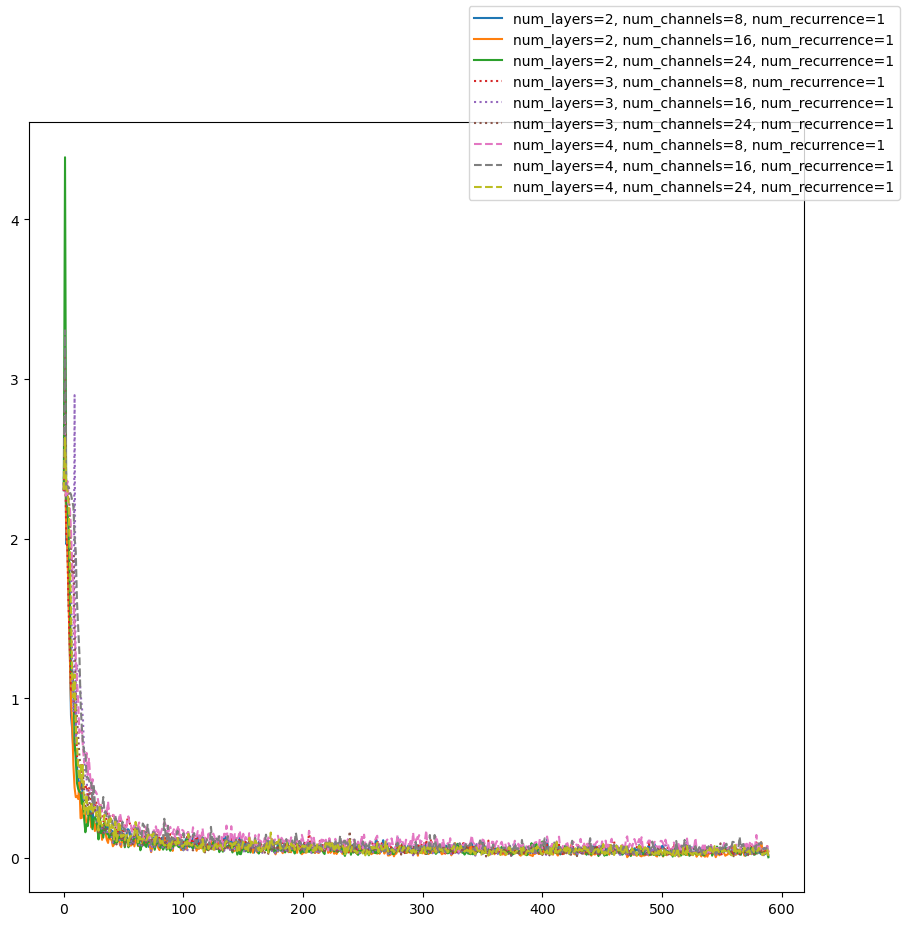

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
kwargs = [{'linestyle': '-'}, {'linestyle': ':'}, {'linestyle': '--'}]
for i in range(3):

    for j in range(3):
        _kwargs = kwargs[i]
        ax.plot(losses[i, 1, j, :], **_kwargs, label=f"num_layers={i+2}, num_channels={j*8+8}, num_recurrence={1}")
        # break
        # for k in range(3):
        #     ax.plot(losses[i, k, j, :], label=f"num_layers={i+2}, num_channels={j*8+8}, num_recurrence={k+1}")
    # break
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels)


print(all_noisy_acc[:, 2, 2, 2])

In [46]:
acc_avg = np.nanmean(all_acc, axis=0)
acc_std = np.nanstd(all_acc, axis=0)
noisy_acc_avg = np.nanmean(all_noisy_acc, axis=0)
noisy_acc_std = np.nanstd(all_noisy_acc, axis=0)
masked_acc_avg = np.nanmean(all_masked_acc, axis=0)
masked_acc_std = np.nanstd(all_masked_acc, axis=0)
left_masked_acc_avg = np.nanmean(all_left_masked_acc, axis=0)
left_masked_acc_std = np.nanstd(all_left_masked_acc, axis=0)
gaussian_blur_acc_avg = np.nanmean(all_gaussian_blur_acc, axis=0)
gaussian_blur_acc_std = np.nanstd(all_gaussian_blur_acc, axis=0)
acc_avg.shape
print(np.sum(noisy_acc_std))
# 3.1820480353566727
# 3.4331005714587133
# 3.831386051146184

4.348543827136718


In [47]:
# bar_width = 0.2
# fig, axes = plt.subplots(3, 3, figsize=(15, 15), sharey=True)
# for num_layers in range(3):
#     for num_channels in range(3):
#         # print(f'num_layers={num_layers}, num_recurrence={num_recurrence}')
#         ax = axes[num_layers, num_channels]
#         ax.set_title(
#             f"num_layers={num_layers + 2}, num_channels={num_channels * 8 + 8}"
#         )
#         ax.set_xlabel("num_recurrence")
#         ax.set_ylabel("test_acc")
#         ax.bar(
#             np.arange(3) - bar_width,
#             acc_avg[num_layers, :, num_channels],
#             yerr=acc_std[num_layers, :, num_channels],
#             capsize=3,
#             label="test_acc",
#             width=bar_width,
#         )
#         ax.bar(
#             np.arange(3),
#             noisy_acc_avg[num_layers, :, num_channels],
#             yerr=noisy_acc_std[num_layers, :, num_channels],
#             capsize=3,
#             label="noisy_test_acc",
#             width=bar_width,
#         )
#         ax.bar(
#             np.arange(3) + bar_width,
#             masked_acc_avg[num_layers, :, num_channels],
#             yerr=masked_acc_std[num_layers, :, num_channels],
#             capsize=3,
#             label="masked_test_acc",
#             width=bar_width,
#         )
#         ax.set_xticks(np.arange(3))

# fig.suptitle(dataset)
# handles, labels = axes[0, 0].get_legend_handles_labels()
# fig.legend(handles, labels)

# # fig.savefig(f'accuracy_averaged_bar_{dataset}.png')

In [48]:
cmap = cmr.nuclear                   # CMasher


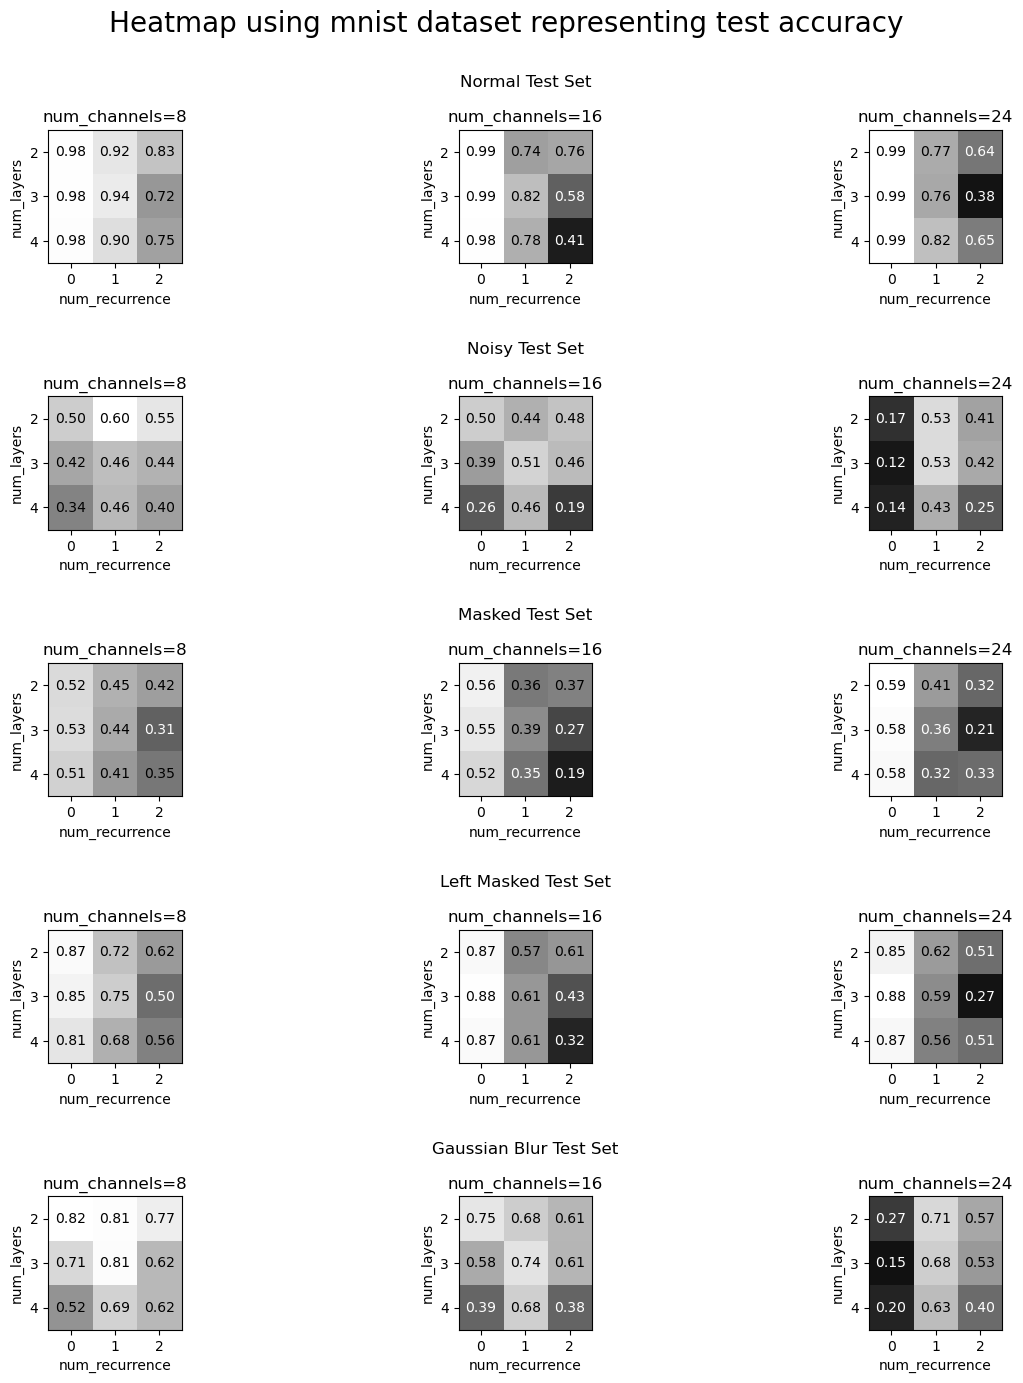

In [49]:
# bar_width=0.2
fig, axes = plt.subplots(5, 3, figsize=(15, 15))

# manual cleanup for mnist
# acc_avg[2, 2, 2] = np.nanmean(all_acc[:, 2, 2, :])
# acc_std[2, 2, 2] = np.nanstd(all_acc[:, 2, 2, :])
# noisy_acc_avg[2, 2, 2] = np.nanmean(all_noisy_acc[:, 2, 2, :])
# noisy_acc_std[2, 2, 2] = np.nanstd(all_noisy_acc[:, 2, 2, :])
# masked_acc_avg[2, 2, 2] = np.nanmean(all_masked_acc[:, 2, 2, :])
# masked_acc_std[2, 2, 2] = np.nanstd(all_masked_acc[:, 2, 2, :])
# left_masked_acc_avg[2, 2, 2] = np.nanmean(all_left_masked_acc[:, 2, 2, :])
# left_masked_acc_std[2, 2, 2] = np.nanstd(all_left_masked_acc[:, 2, 2, :])
# gaussian_blur_acc_avg[2, 2, 2] = np.nanmean(all_gaussian_blur_acc[:, 2, 2, :])
# gaussian_blur_acc_std[2, 2, 2] = np.nanstd(all_gaussian_blur_acc[:, 2, 2, :])

# Manual cleanup for cifar10
# print(acc_avg[1, 2, 2])
# acc_avg[1, 2, 2] = np.nanmean(all_acc[:, :, 2, 2])
# acc_std[1, 2, 2] = np.nanstd(all_acc[:, :, 2, 2])
# noisy_acc_avg[1, 2, 2] = np.nanmean(all_noisy_acc[:, :, 2, 2])
# noisy_acc_std[1, 2, 2] = np.nanstd(all_noisy_acc[:, :, 2, 2])
# masked_acc_avg[1, 2, 2] = np.nanmean(all_masked_acc[:, :, 2, 2])
# masked_acc_std[1, 2, 2] = np.nanstd(all_masked_acc[:, :, 2, 2])
# left_masked_acc_avg[1, 2, 2] = np.nanmean(all_left_masked_acc[:, :, 2, 2])
# left_masked_acc_std[1, 2, 2] = np.nanstd(all_left_masked_acc[:, :, 2, 2])
# gaussian_blur_acc_avg[1, 2, 2] = np.nanmean(all_gaussian_blur_acc[:, :, 2, 2])
# gaussian_blur_acc_std[1, 2, 2] = np.nanstd(all_gaussian_blur_acc[:, :, 2, 2])

test_sets = [acc_avg, noisy_acc_avg, masked_acc_avg, left_masked_acc_avg, gaussian_blur_acc_avg]

for i, test_set in enumerate(test_sets):
    vmin = np.min(test_set) - 0.05
    vmax = np.max(test_set)
    _kwargs = {"vmin": vmin, "vmax": vmax, "cmap": "gray"}
    for num_channels in range(3):
        ax = axes[i,num_channels]
        ax.set_title(f'num_channels={num_channels * 8 + 8}')
        ax.set_xlabel('num_recurrence')
        ax.set_ylabel('num_layers')
        im = ax.imshow(test_set[:, :, num_channels], **_kwargs)
        ax.set_xticks(np.arange(3))
        ax.set_yticks(np.arange(3))
        ax.set_yticklabels(np.arange(2,5))
        annotate_heatmap(im, valfmt="{x:.2f}")


axes[0,1].set_title('\nNormal Test Set\n\nnum_channels=16')
axes[1,1].set_title('Noisy Test Set\n\nnum_channels=16')
axes[2,1].set_title('Masked Test Set\n\nnum_channels=16')
axes[3,1].set_title('Left Masked Test Set\n\nnum_channels=16')
axes[4,1].set_title('Gaussian Blur Test Set\n\nnum_channels=16')

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=1)
fig.suptitle(f"Heatmap using {dataset} dataset representing test accuracy", fontsize=20)

fig.savefig(f'accuracy_averaged_heatmap_bn_{dataset}.png')

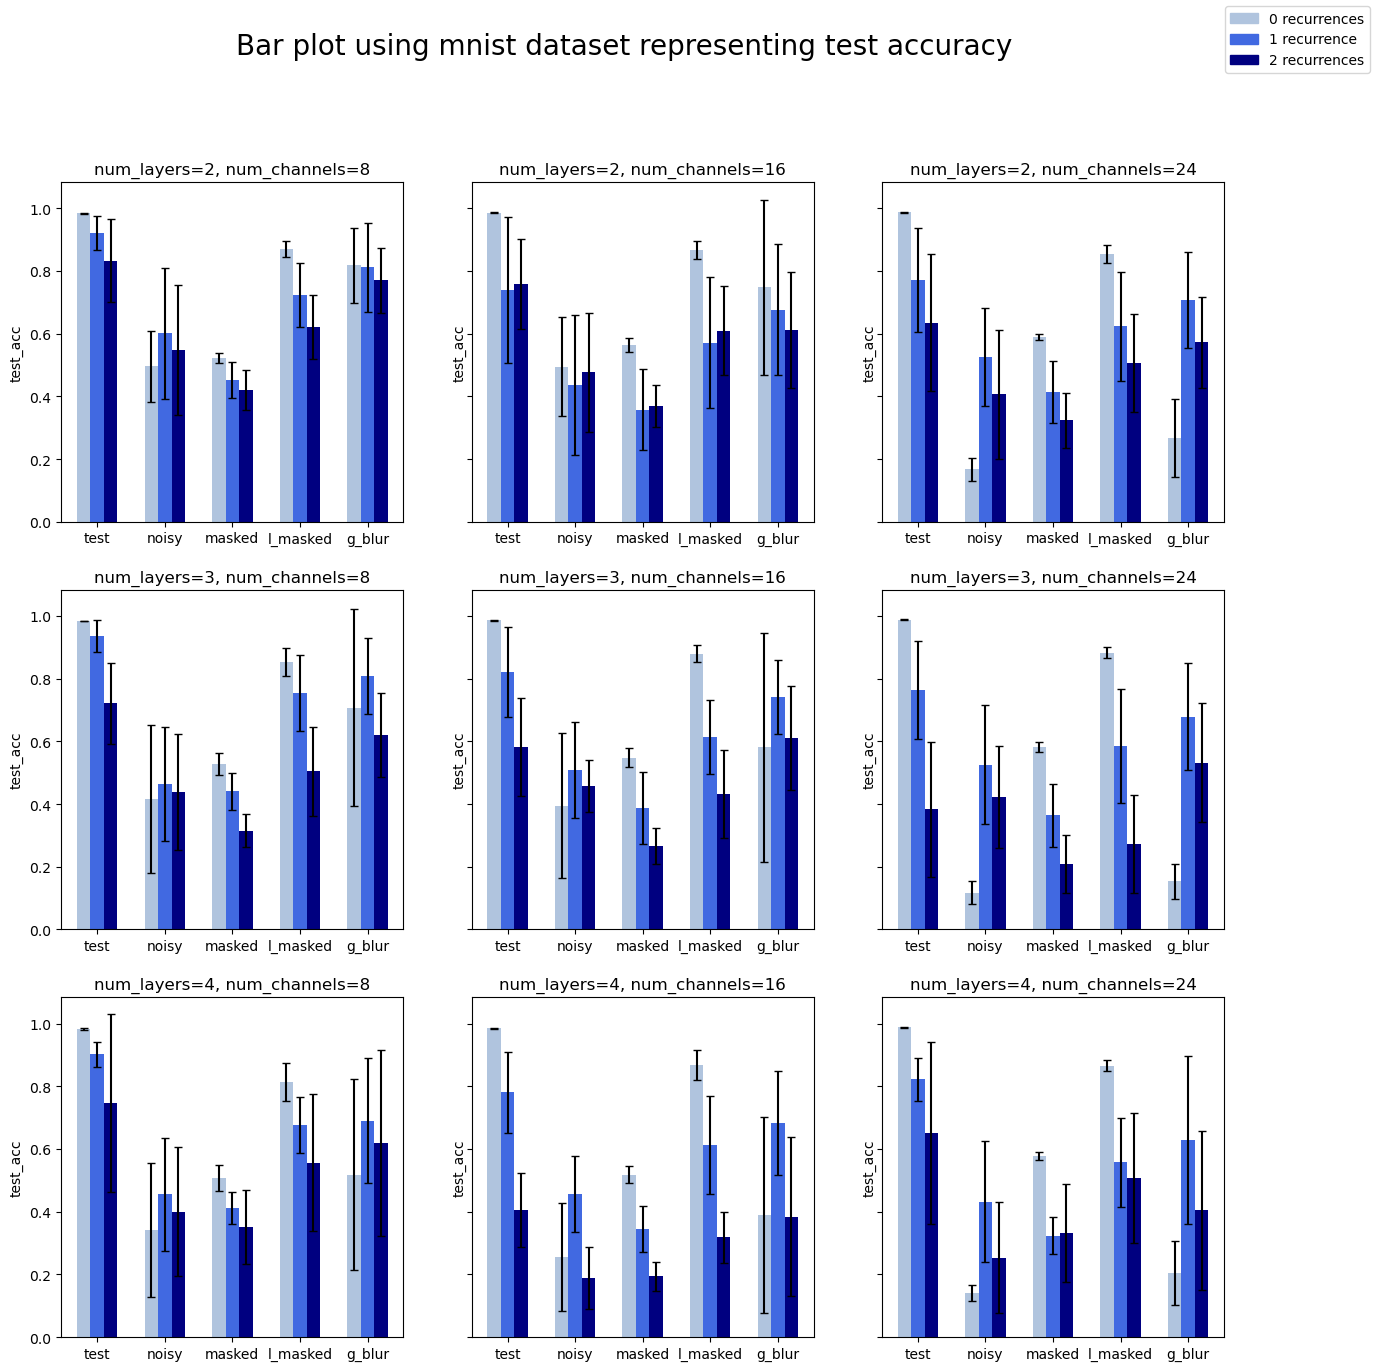

In [50]:
bar_width=0.2
colors=['lightsteelblue', 'royalblue', 'navy']
fig, axes = plt.subplots(3, 3, figsize=(15, 15), sharey=True)
for num_layers in range(3):
    for num_channels in range(3):
        ax = axes[num_layers, num_channels]
        ax.set_title(f'num_layers={num_layers + 2}, num_channels={num_channels * 8 + 8}')
        ax.set_ylabel('test_acc')
        ax.bar(np.arange(-1,2)*bar_width, acc_avg[num_layers, :, num_channels], yerr=acc_std[num_layers, :, num_channels], capsize=3, label='test_acc', width=bar_width, color=colors)
        ax.bar(np.arange(-1,2)*bar_width + 1, noisy_acc_avg[num_layers, :, num_channels],  yerr=noisy_acc_std[num_layers, :, num_channels], capsize=3, label='noisy_test_acc', width=bar_width, color=colors)
        ax.bar(np.arange(-1,2)*bar_width + 2, masked_acc_avg[num_layers, :, num_channels], yerr=masked_acc_std[num_layers, :, num_channels], capsize=3, label='masked_test_acc', width=bar_width, color=colors)
        ax.bar(np.arange(-1,2)*bar_width + 3, left_masked_acc_avg[num_layers, :, num_channels], yerr=left_masked_acc_std[num_layers, :, num_channels], capsize=3, label='masked_test_acc', width=bar_width, color=colors)
        ax.bar(np.arange(-1,2)*bar_width + 4, gaussian_blur_acc_avg[num_layers, :, num_channels], yerr=gaussian_blur_acc_std[num_layers, :, num_channels], capsize=3, label='masked_test_acc', width=bar_width, color=colors)
        ax.set_xticks(np.arange(5))
        ax.set_xticklabels(['test', 'noisy', 'masked', 'l_masked', 'g_blur'])

handles, labels = axes[0, 0].get_legend_handles_labels()
zero_r = mpatches.Patch(color=colors[0], label='0 recurrences')
one_r = mpatches.Patch(color=colors[1], label='1 recurrence')
two_r = mpatches.Patch(color=colors[2], label='2 recurrences')
fig.legend(handles=[zero_r, one_r, two_r])

fig.suptitle(f"Bar plot using {dataset} dataset representing test accuracy", fontsize=20)

fig.savefig(f'accuracy_averaged_bar_bn_{dataset}.png')

In [13]:
def annotate_heatmap(
    im,
    data=None,
    valfmt="{x:.2f}",
    textcolors=("black", "white"),
    threshold=None,
    **textkw
):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max()) / 2.0

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center", verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) < threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [240]:
# Now for MNIST

In [241]:
# dataset = "MNIST_seed=0_"
# with open(f"./{dataset}combined_list.pkl", "rb") as f:
#     combined_seed_0 = pkl.load(f)

# dataset = "MNIST_seed=10000_"
# with open(f"./{dataset}combined_list.pkl", "rb") as f:
#     combined_seed_10k = pkl.load(f)

# dataset = "MNIST_seed=1000000_"
# with open(f"./{dataset}combined_list.pkl", "rb") as f:
#     combined_seed_1m = pkl.load(f)


In [242]:
# # Average across datasets with different seeds
# combined_averaged = {}
# for key in combined_seed_0.keys():
#     combined_averaged[key] = combined_seed_0[key] = (combined_seed_0[key] + combined_seed_10k[key] + combined_seed_1m[key]) / 3


In [243]:
# bar_width=0.2
# fig, axes = plt.subplots(3, 3, figsize=(15, 15))
# for num_layers in range(3):
#     for num_channels in range(3):
#         # print(f'num_layers={num_layers}, num_recurrence={num_recurrence}')
#         ax = axes[num_layers, num_channels]
#         ax.set_title(f'num_layers={num_layers + 2}, num_channels={num_channels * 8 + 8}')
#         ax.set_xlabel('num_recurrence')
#         ax.set_ylabel('test_acc')
#         ax.bar(np.arange(3)-bar_width, combined_averaged['test_accs'][num_layers, :, num_channels], label='test_acc', width=bar_width)
#         ax.bar(np.arange(3), combined_averaged['noisy_test_accs'][num_layers, :, num_channels], label='noisy_test_acc', width=bar_width)
#         ax.bar(np.arange(3)+bar_width, combined_averaged['masked_test_accs'][num_layers, :, num_channels], label='masked_test_acc', width=bar_width)
#         ax.set_xticks(np.arange(3))

# handles, labels = axes[0, 0].get_legend_handles_labels()
# fig.legend(handles, labels)
# fig.savefig('accuracy_averaged_mnist.png')